# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

$F1_{\text{macro}} = \frac{1}{N} \sum_{i=1}^{N} F1_i, \quad \text{where} \quad F1_i = \frac{2 \cdot \text{precision}_i \cdot \text{recall}_i}{\text{precision}_i + \text{recall}_i}$


## Author(s)
Add your information here

Name(s): Mitun Paul, Akash Shingha Bappy

Student number(s):2307325, 2307938

## Description

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br>
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>

</div>

In [1]:
# @title
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "./MEx"

In [2]:
# @title
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)

    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df

    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [3]:
# @title
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""

# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.

for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())

    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue

        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()

        records_windowed.append(tmp_data)

df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


<a id='task1'></a>
<div class=" alert alert-warning">
     
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>

</div>

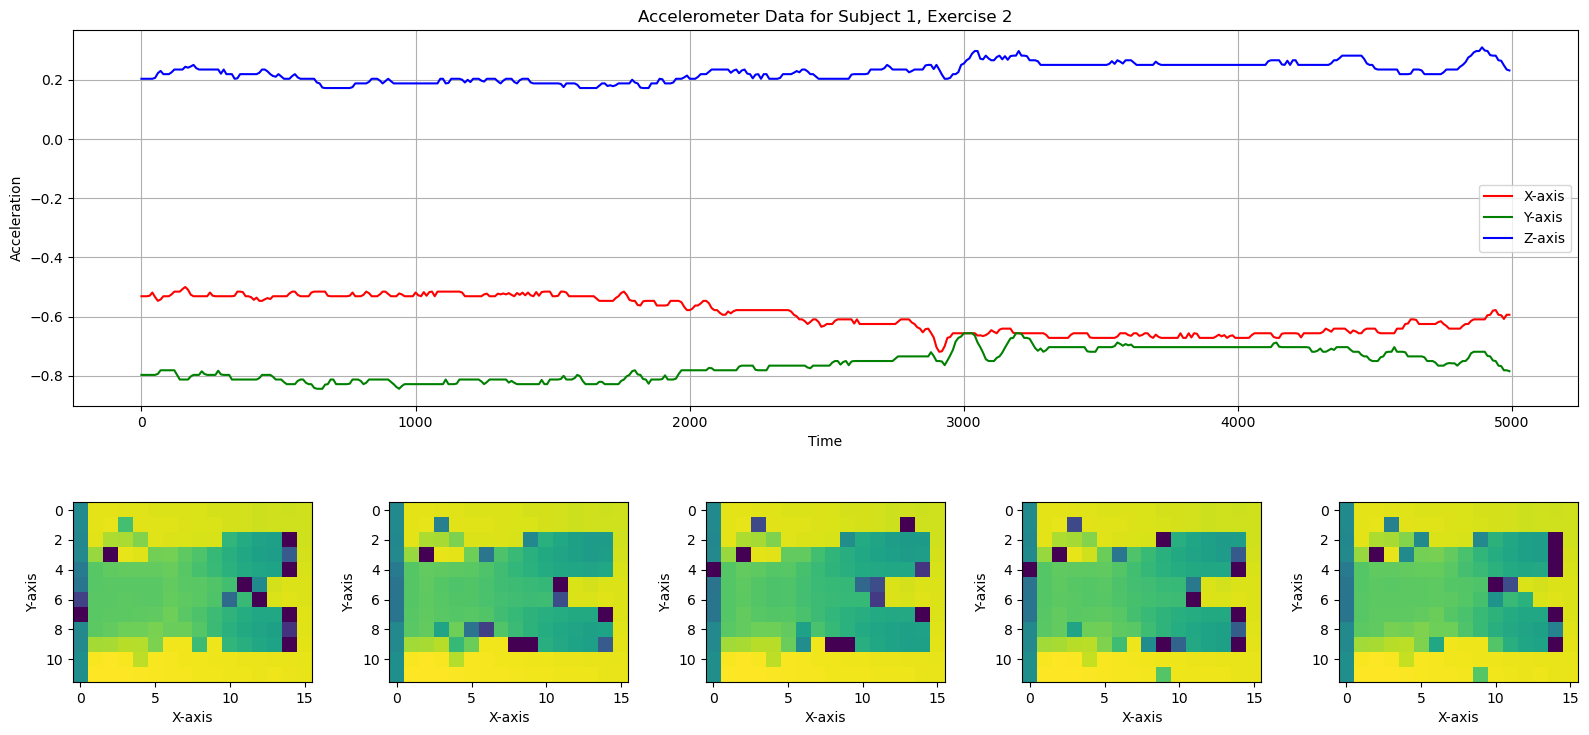

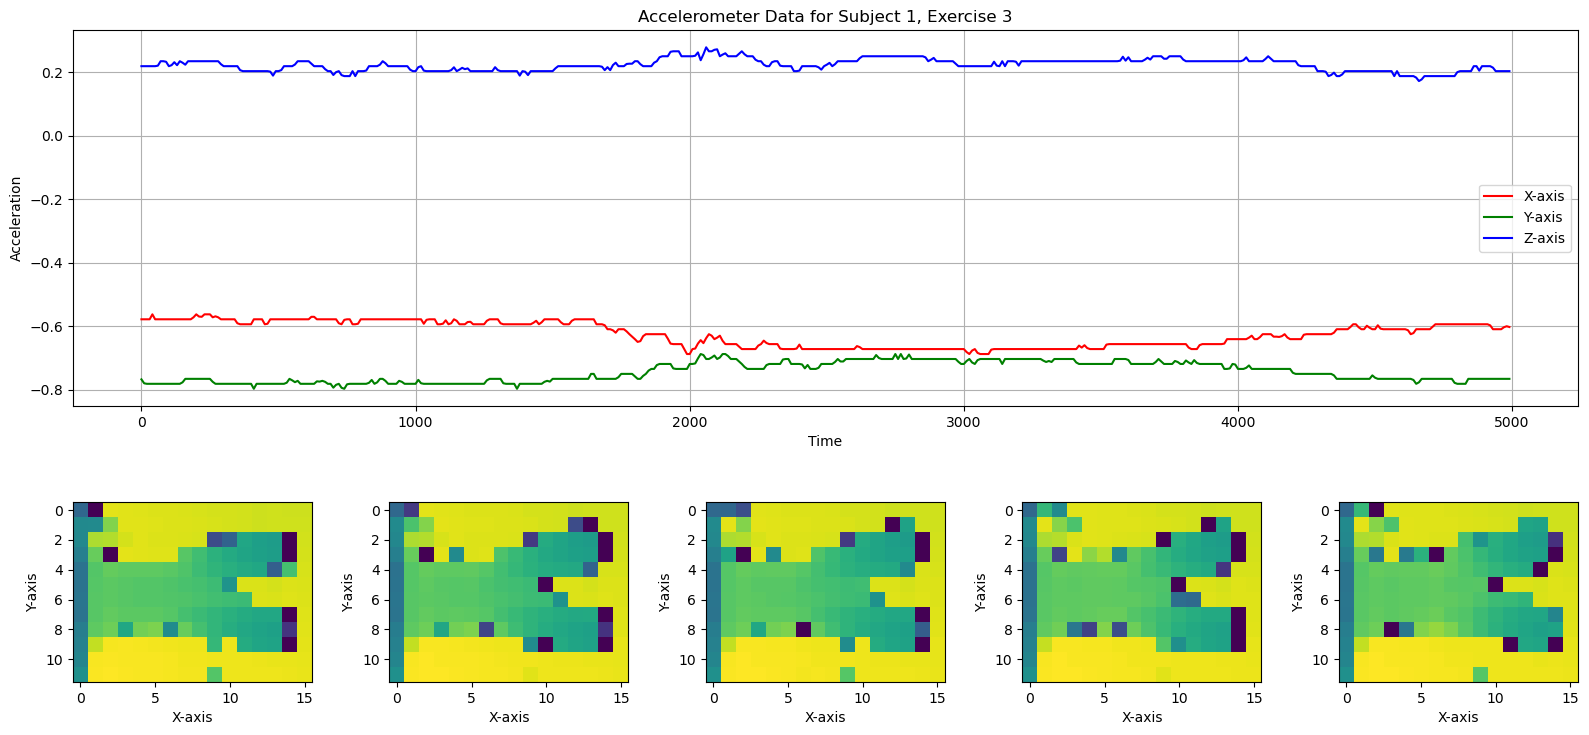

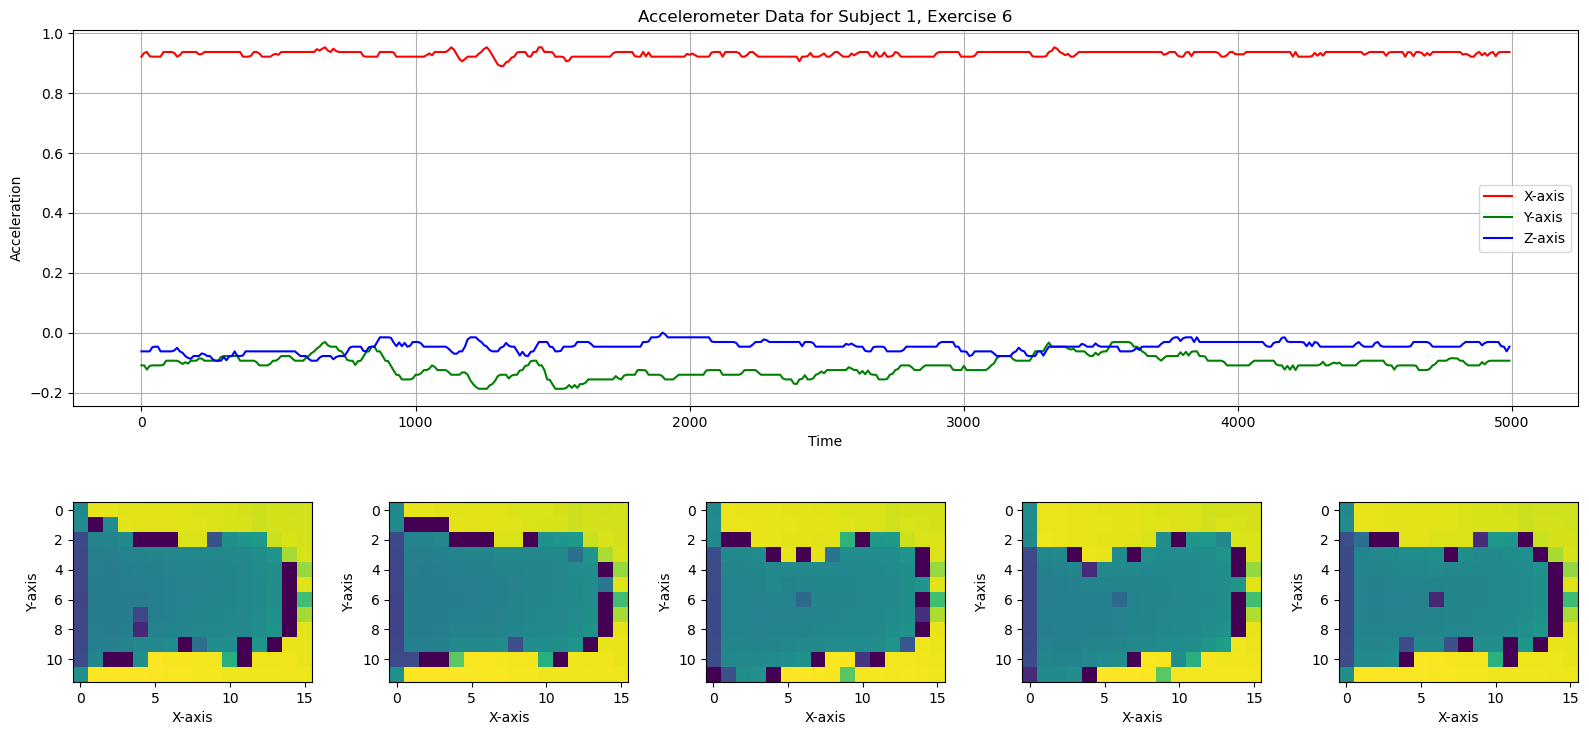

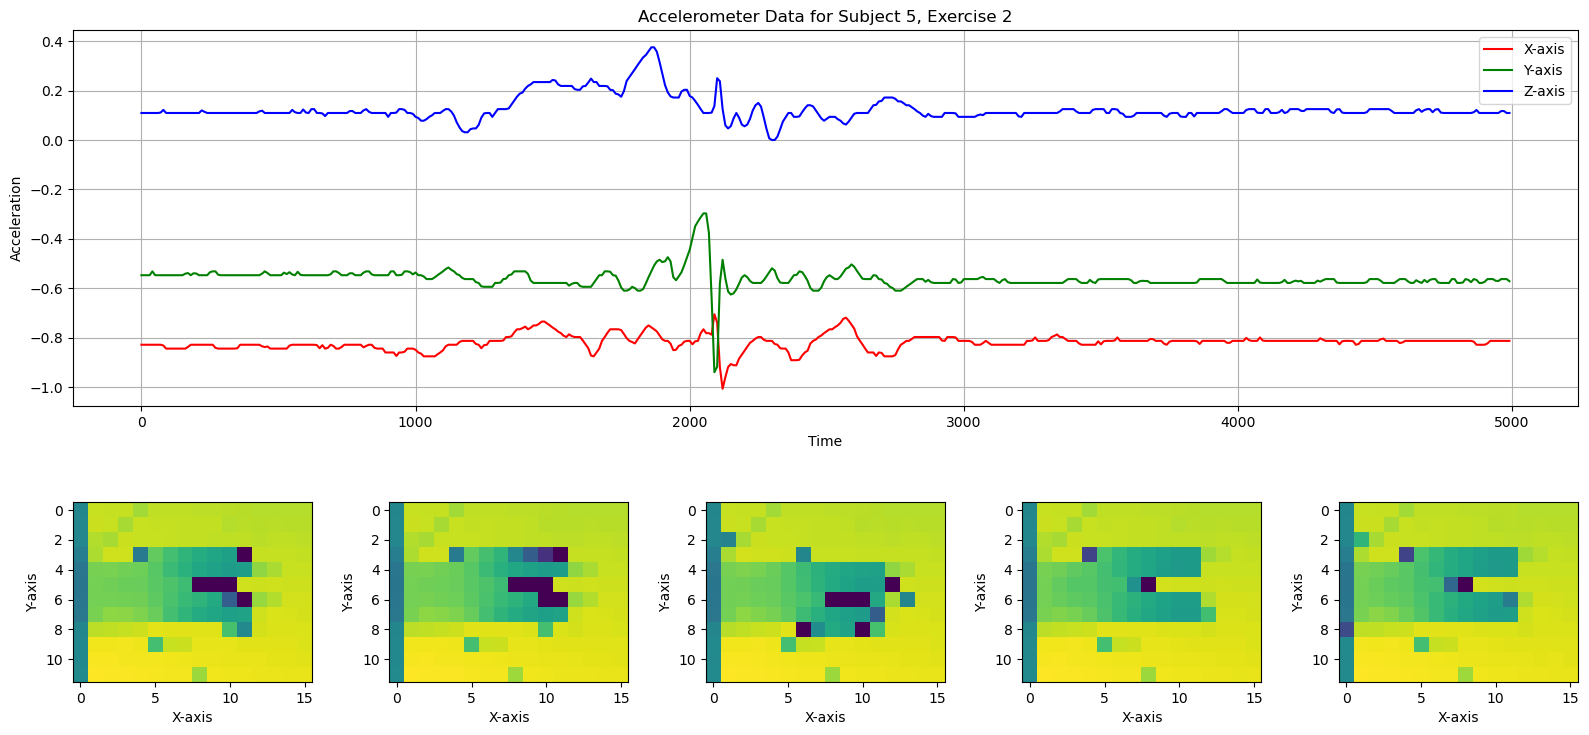

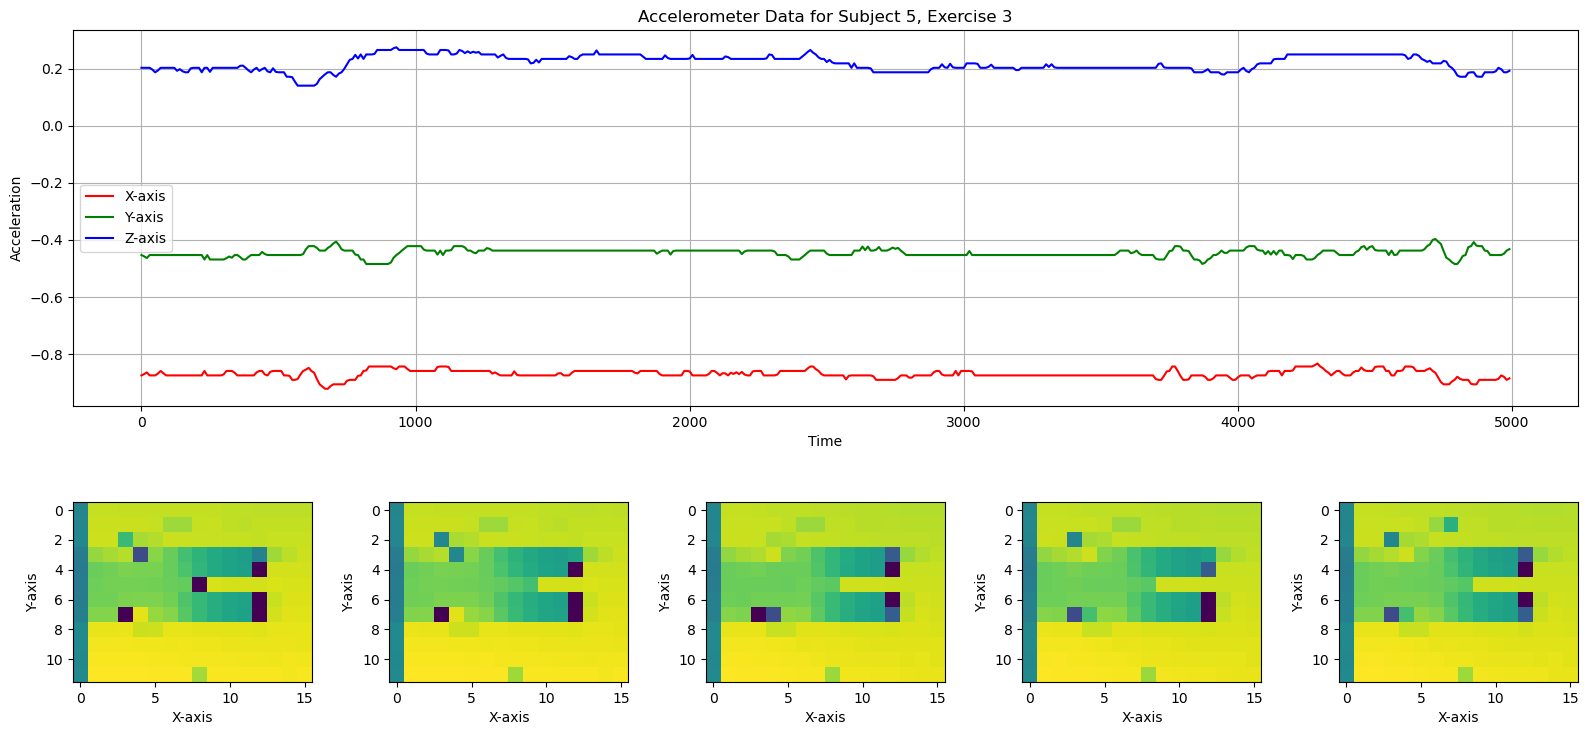

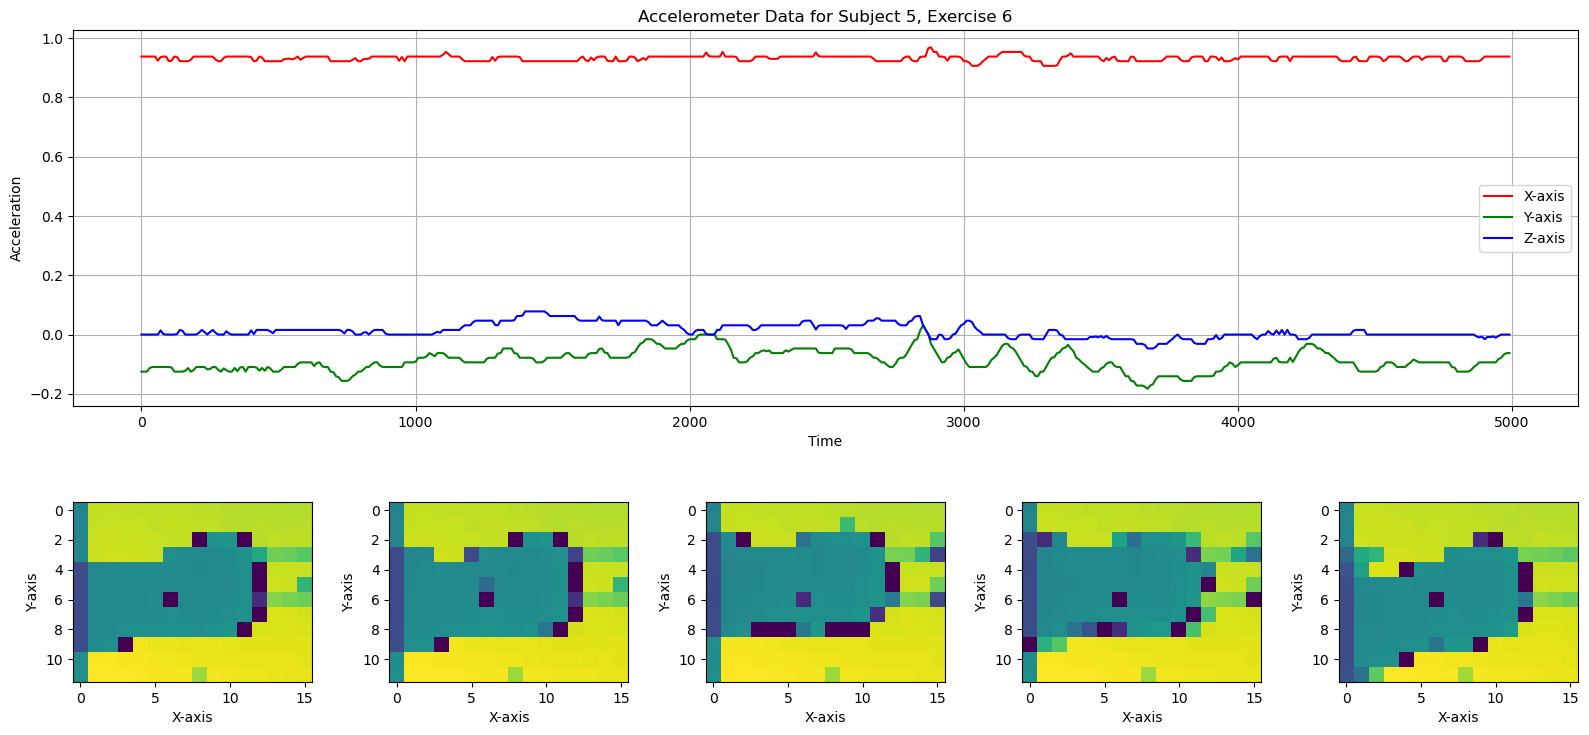

In [4]:
# @title
# 1.1. Visualize selected samples for both modalities

### Your code begins here ###
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def plot_accelerometer_and_depth_data(accelerometer_data, depth_camera_data, subject_id, exercise_id):
    # Create a figure and a grid of subplots
    fig = plt.figure(figsize=(16, 8))

    # Add subplots for accelerometer data (2 rows, 1 column)
    ax1 = fig.add_subplot(2, 1, 1)  # Position: row 1, col 1

    # Plot accelerometer data for X, Y, and Z axes
    ax1.plot(accelerometer_data["time"], accelerometer_data["acc_0"], label='X-axis', color='r')
    ax1.plot(accelerometer_data["time"], accelerometer_data["acc_1"], label='Y-axis', color='g')
    ax1.plot(accelerometer_data["time"], accelerometer_data["acc_2"], label='Z-axis', color='b')
    ax1.set_title(f'Accelerometer Data for Subject {subject_id}, Exercise {exercise_id}')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Acceleration')
    ax1.legend()
    ax1.grid(True)  # Turn on the grid for the first subplot

    # Add subplots for depth camera data (2 rows, 5 columns)
    for i in range(5):
        ax = fig.add_subplot(2, 5, i + 6)  # Position: row 2, col 1 to 5

        # Plot depth camera data for the i-th exercise
        im = ax.imshow(depth_camera_data.iloc[i, 1:].to_numpy().reshape((12, 16)), cmap='viridis')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

subjects = (1, 5) # Subject to Select
exercises = (2, 3, 6) # Exercises to select

# iterate through selcted subject and exercise for plotting
for subject_id, exercise_id in product(subjects, exercises):

    # filter data according subject_id and exercise_id
    filtered_data = df_records_windowed[(df_records_windowed['subject_id'].astype(int) == subject_id) &
                                        (df_records_windowed['exercise_id'].astype(int) == exercise_id)]
    # getting accelarometer data of window_idx = 0
    accelerometer_data = filtered_data[
        (filtered_data['sensor'] == "acc")
    & (filtered_data['window_idx'].astype(int) == 0)
    ]["df"].iloc[0]

    # getting depth sensor data of window_idx = 0
    depth_camera_data = filtered_data[
        (filtered_data['sensor'] == "dc")
    & (filtered_data['window_idx'].astype(int) == 0)
    ]["df"].iloc[0]
    # print(depth_camera_data.shape)

    # plotting the acc and dc data for each subject and exercise
    plot_accelerometer_and_depth_data(
        accelerometer_data,
        depth_camera_data,
        subject_id,
        exercise_id
    )

### Your code ends here ###

<a id='task1'></a>
<div class=" alert alert-warning">

<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
  
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [5]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments

### Your code begins here ###

# train subjets: 1-7, test_subject: 8-10
train_subjects, test_subjects = range(1, 8), range(8, 11)

# Filter data for training and testing sets
train_data = df_records_windowed[
    (df_records_windowed['subject_id'].astype(int).isin(train_subjects))
]

test_data = df_records_windowed[
    (df_records_windowed['subject_id'].astype(int).isin(test_subjects))
]
acc_windows_train = train_data[train_data['sensor'] == "acc"]
dc_windows_train = train_data[train_data['sensor'] == "dc"]

# Merge with an outer join based on specified columns
merged_data = acc_windows_train.merge(dc_windows_train, on=['subject_id', 'exercise_id', 'trial', 'window_idx'], how='outer', indicator=True)

# Drop windows without a pair in the training set (acc without dc)
missing_data = merged_data[merged_data['_merge']!='both']
for index, row in missing_data.iterrows():
    train_data = train_data.drop(train_data[(train_data['subject_id'] == row['subject_id']) &
                                            (train_data['exercise_id'] == row['exercise_id']) &
                                            (train_data['trial'] == row['trial']) &
                                            (train_data['window_idx'] == row['window_idx'])].index)



print(f'Train window samples: DC:{len(train_data[train_data["sensor"] == "dc"])} ACC:{len(train_data[train_data["sensor"] == "acc"])}')
print(f'Test window samples: DC:{len(test_data[test_data["sensor"] == "dc"])} ACC:{len(test_data[test_data["sensor"] == "acc"])}')
### Your code ends here ###

Train window samples: DC:1486 ACC:1486
Test window samples: DC:598 ACC:598


# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

<Figure size 800x600 with 0 Axes>

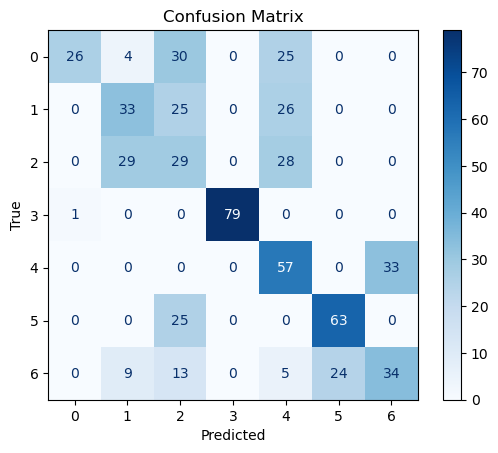

F1 Score: 0.5446874020196477


In [6]:
# 2.1

### Your code begins here ###
import numpy as np
from scipy.signal import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def convert_np_array(df_train):
    # convert to list
    array_list = [df.values[:, 1:] for df in df_train]

    # convert to numPy array
    result_array = np.array(array_list)
    return result_array

def downsample_data(data, original_rate, target_rate):

    # Calculate the new number of points needed
    original_length = data.shape[1]
    target_length = int(original_length * target_rate / original_rate)

    # Downsample using scipy.signal.resample
    downsampled_data = resample(data, target_length, axis=1)

    return downsampled_data

def standardize_data(data):

    # Reshape the data to 2D (flatten the second and third dimensions)
    flattened_data = data.reshape(data.shape[0], -1)

    # Standardize using scikit-learn's StandardScaler
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(flattened_data)

    # Reshape the standardized data back to the original shape
    standardized_data = standardized_data.reshape(data.shape)

    return standardized_data

def transform_data_accelarometer(X_train, y_train, X_test, n_components_pca, n_components_lda):
    transformed_train_data = np.zeros((X_train.shape[0], 3 * 10))  # 3 axes, each transformed to 10 features (5 PCA + 5 LDA)

    for i in range(3):  # Iterate over each axis
        # Extract the data for this axis
        axis_train_data = X_train[:, :, i]

        # Apply PCA
        pca = PCA(n_components=n_components_pca)
        axis_train_data_pca = pca.fit_transform(axis_train_data)

        # Apply LDA
        lda = LDA(n_components=n_components_lda)
        axis_train_data_lda = lda.fit_transform(axis_train_data, y_train)

        # Concatenate PCA and LDA outputs and store them
        transformed_train_data[:, i*10:(i+1)*10] = np.concatenate([axis_train_data_pca, axis_train_data_lda], axis=1)

    transformed_test_data = np.zeros((X_test.shape[0], 3 * 10))

    for i in range(3):  # Iterate over each axis
        axis_test_data = X_test[:, :, i]

        # Use the previously fitted PCA and LDA models for test data
        axis_test_data_pca = pca.transform(axis_test_data)
        axis_test_data_lda = lda.transform(axis_test_data)

        # Concatenate PCA and LDA outputs and store them
        transformed_test_data[:, i*10:(i+1)*10] = np.concatenate([axis_test_data_pca, axis_test_data_lda], axis=1)

    return transformed_train_data, transformed_test_data


def pca_lda_fusion(training_examples, train_labels, test_examples):
    y_pred = []
    for test_example in test_examples:
        # Compute Euclidean distances
        distance = np.linalg.norm(training_examples - test_example, axis=1)

        # Normalize values between 0 and 1
        distance_norm = (distance - np.min(distance)) / (np.max(distance) - np.min(distance))

        # Fuse by averaging (arithmetic mean)
        fusion = 0.5 * (distance_norm)

        # Classify test example as belonging to the class of the nearest neighbor
        map_train_index = np.argmin(fusion)

        # append predictions
        y_pred.append(train_labels[map_train_index])

    return np.array(y_pred)


def process_and_predict(train_data, test_data, train_labels, n_components_pca=10, n_components_lda=5):
    original_rate = 100  # Hz
    target_rate = 25  # Hz

    # Downsample training data
    downsampled_train_data = downsample_data(train_data, original_rate, target_rate)

    # Downsample testing data
    downsampled_test_data = downsample_data(test_data, original_rate, target_rate)

    # Standardize training data
    standardized_train_data = standardize_data(downsampled_train_data)

    # Standardize testing data
    standardized_test_data = standardize_data(downsampled_test_data)

    # PCA-LDA transformation
    transformed_train_data, transformed_test_data = transform_data_accelarometer(
                                                        standardized_train_data,
                                                        train_labels,
                                                        standardized_test_data,
                                                        n_components_pca,
                                                        n_components_lda
                                                        )

    # PCA-LDA fusion
    y_pred = pca_lda_fusion(transformed_train_data, train_labels, transformed_test_data)

    return y_pred

def calculate_f1_score(y_test, y_pred):
    unique_classes = set(y_test)  # Unique classes in the true labels
    N = len(unique_classes)  # Number of classes

    f1_macro_sum = 0  # Sum of F1 scores for each class

    for c in unique_classes:
        true_positive = sum((yt == c and yp == c) for yt, yp in zip(y_test, y_pred))
        false_positive = sum((yt != c and yp == c) for yt, yp in zip(y_test, y_pred))
        false_negative = sum((yt == c and yp != c) for yt, yp in zip(y_test, y_pred))

        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

        f1_i = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        f1_macro_sum += f1_i

    f1_macro = f1_macro_sum / N

    return f1_macro

def plot_confusion_matrix(y_test, y_pred, labels=None):
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Set up the confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# train_data = np.random.rand(1486, 500, 3)
# test_data = np.random.rand(598, 500, 3)
# train_labels = np.random.randint(8, size=(1486,))
# test_labels = np.random.randint(8, size=(598,))

# Accelarometer data
train_acc_data = train_data[train_data["sensor"] == "acc"]
test_acc_data = test_data[test_data["sensor"] == "acc"]

# Train-Test data
X_train_acc, X_test_acc, y_train_acc, y_test_acc = (
    train_acc_data["df"],
    test_acc_data["df"],
    train_acc_data["exercise_id"],
    test_acc_data["exercise_id"]
    )

X_train_acc = convert_np_array(X_train_acc)
X_test_acc = convert_np_array(X_test_acc)
y_train_acc = y_train_acc.to_numpy()
y_test_acc = y_test_acc.to_numpy()

# print(X_train_acc.shape)
predicted_labels = process_and_predict(X_train_acc, X_test_acc, y_train_acc, n_components_pca=5, n_components_lda=5)

# Evaluate
f1_score = calculate_f1_score(y_test_acc, predicted_labels)
plot_confusion_matrix(y_test_acc, predicted_labels)
print(f"F1 Score: {f1_score}")


### Your code ends here ###

<a id='task2'></a>
<div class=" alert alert-warning">
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

<Figure size 800x600 with 0 Axes>

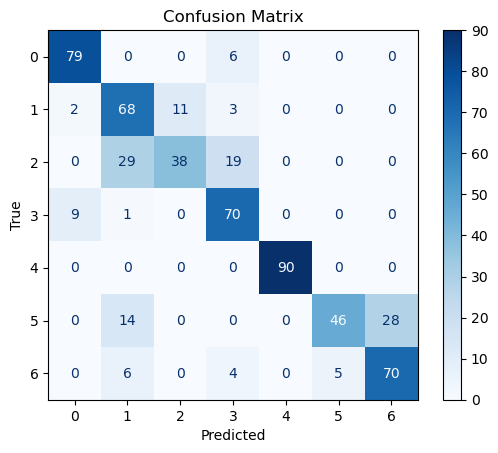

F1 Score: 0.762173718255006


In [7]:
# 2.2

### Your code begins here ###

def transform_data_depth_sensor(train_data, train_labels, test_data, n_components_pca, n_components_lda):
    # Initialize arrays to store transformed data
    X_train_transformed = np.zeros((train_data.shape[0], 5 * (n_components_pca + n_components_lda)))  # 5 images, each transformed to 10 features (5 PCA + 5 LDA)

    # Apply PCA and LDA for each image
    for i in range(5):  # Iterate over each image
        # Reshape the data for this image
        X_image = train_data[:, i, :].reshape(train_data.shape[0], -1)

        # Apply PCA
        pca = PCA(n_components=n_components_pca)
        X_image_pca = pca.fit_transform(X_image)

        # Apply LDA
        lda = LDA(n_components=n_components_lda)
        X_image_lda = lda.fit_transform(X_image, train_labels)

        # Concatenate PCA and LDA outputs and store them
        X_train_transformed[:, i*10:(i+1)*10] = np.concatenate([X_image_pca, X_image_lda], axis=1)

    # Initialize arrays to store transformed data
    X_test_transformed = np.zeros((test_data.shape[0], 5 * (n_components_pca + n_components_lda))) # 5 images, each transformed to 10 features (5 PCA + 5 LDA)

    for i in range(5):  # Iterate over each image
        X_image_test = test_data[:, i, :].reshape(test_data.shape[0], -1)
        X_image_test_pca = pca.transform(X_image_test)
        X_image_test_lda = lda.transform(X_image_test)
        X_test_transformed[:, i*10:(i+1)*10] = np.concatenate([X_image_test_pca, X_image_test_lda], axis=1)

    return X_train_transformed, X_test_transformed

def process_and_predict_depth_sensor(train_data, test_data, train_labels, n_components_pca=10, n_components_lda=5):

    # Standardize training data
    standardized_train_data = standardize_data(train_data)

    # Standardize testing data
    standardized_test_data = standardize_data(test_data)

    # PCA-LDA transformation
    transformed_train_data, transformed_test_data = transform_data_depth_sensor(
                                                        standardized_train_data,
                                                        train_labels,
                                                        standardized_test_data,
                                                        n_components_pca,
                                                        n_components_lda
                                                        )

    # PCA-LDA fusion
    y_pred = pca_lda_fusion(transformed_train_data, train_labels, transformed_test_data)

    return y_pred

# Accelarometer data
train_dc = train_data[train_data["sensor"] == "dc"]
test_dc = test_data[test_data["sensor"] == "dc"]

# Train-Test data
X_train_dc, X_test_dc, y_train_dc, y_test_dc = (
    train_dc["df"],
    test_dc["df"],
    train_dc["exercise_id"],
    test_dc["exercise_id"]
    )

X_train_dc = convert_np_array(X_train_dc)
X_test_dc = convert_np_array(X_test_dc)
y_train_dc = y_train_dc.to_numpy()
y_test_dc = y_test_dc.to_numpy()

# print(X_train_dc.shape)
predicted_labels = process_and_predict_depth_sensor(X_train_dc, X_test_dc, y_train_dc, n_components_pca=5, n_components_lda=5)

# Evaluate
f1_score = calculate_f1_score(y_test_dc, predicted_labels)
plot_confusion_matrix(y_test_dc, predicted_labels)
print(f"F1 Score: {f1_score}")

### Your code ends here ###

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   

<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>

Document your work.
    
</div>

In [8]:
# 3.1

### Your code begins here ###
def pca_transform_accelarometer(X_train, y_train, X_test, n_components_pca=10):
    transformed_train_data = np.zeros((X_train.shape[0], 3 * n_components_pca))  # 3 axes, each transformed to 10 features (5 PCA + 5 LDA)

    for i in range(3):  # Iterate over each axis
        # Extract the data for this axis
        axis_train_data = X_train[:, :, i]

        # Apply PCA
        pca = PCA(n_components=n_components_pca)
        axis_train_data_pca = pca.fit_transform(axis_train_data)

        # store them
        transformed_train_data[:, i*10:(i+1)*10] = axis_train_data_pca

    transformed_test_data = np.zeros((X_test.shape[0], 3 * n_components_pca))

    for i in range(3):  # Iterate over each axis
        axis_test_data = X_test[:, :, i]

        # Use the previously fitted PCA model for test data
        axis_test_data_pca = pca.transform(axis_test_data)

        # store them
        transformed_test_data[:, i*10:(i+1)*10] = axis_test_data_pca

    return transformed_train_data, transformed_test_data

def calculate_mean_std(data):

    # Calculate mean along the second axis (axis=1) for each axis
    mean_per_axis = np.mean(data, axis=1)

    # Calculate standard deviation along the second axis (axis=1) for each axis
    std_per_axis = np.std(data, axis=1)

    # Concatenate mean and standard deviation arrays along the second axis (axis=1)
    concatenated_array = np.concatenate((mean_per_axis, std_per_axis), axis=1)

    return concatenated_array

# X_train_acc = convert_np_array(X_train_acc)
# X_test_acc = convert_np_array(X_test_acc)
# y_train_acc = y_train_acc.to_numpy()
# y_test_acc = y_test_acc.to_numpy()

train_pca_transform_accelarometer, test_pca_transform_accelarometer = pca_transform_accelarometer(X_train_acc, y_train_acc, X_test_acc, n_components_pca=10)
train_mean_std, test_mean_std = calculate_mean_std(X_train_acc), calculate_mean_std(X_test_acc)

train_pca_transform_accelarometer = np.concatenate((train_pca_transform_accelarometer, train_mean_std), axis=1)
test_pca_transform_accelarometer = np.concatenate((test_pca_transform_accelarometer, test_mean_std), axis=1)

print(train_pca_transform_accelarometer.shape)
### Your code ends here ###

(1486, 36)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>

Document your work.
    
</div>

In [9]:
# 3.2

### Your code begins here ###
def pca_transform_data_depth_sensor(train_data, train_labels, test_data, n_components_pca=10):
    # Initialize arrays to store transformed data
    X_train_transformed = np.zeros((train_data.shape[0], 5 * (n_components_pca)))  # 5 images, each transformed to 10 features (5 PCA + 5 LDA)

    # Apply PCA for each image
    for i in range(5):  # Iterate over each image
        # Reshape the data for this image
        X_image = train_data[:, i, :].reshape(train_data.shape[0], -1)

        # Apply PCA
        pca = PCA(n_components=n_components_pca)
        X_image_pca = pca.fit_transform(X_image)

        # Store the PCA outputs
        X_train_transformed[:, i*10:(i+1)*10] = X_image_pca

    # Initialize arrays to store transformed data
    X_test_transformed = np.zeros((test_data.shape[0], 5 * (n_components_pca))) # 5 images, each transformed to 10 features (5 PCA + 5 LDA)

    for i in range(5):  # Iterate over each image
        X_image_test = test_data[:, i, :].reshape(test_data.shape[0], -1)
        X_image_test_pca = pca.transform(X_image_test)
        X_test_transformed[:, i*10:(i+1)*10] = X_image_test_pca

    return X_train_transformed, X_test_transformed


# X_train_dc = convert_np_array(X_train_dc)
# X_test_dc = convert_np_array(X_test_dc)
# y_train_dc = y_train_dc.to_numpy()
# y_test_dc = y_test_dc.to_numpy()

train_pca_transform_depth_sensor, test_pca_transform_depth_sensor = pca_transform_data_depth_sensor(X_train_dc, y_train_dc, X_test_dc, n_components_pca=10)

print(train_pca_transform_depth_sensor.shape)

### Your code ends here ###

(1486, 50)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>

Note: Normalize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes. (The expected F1 score for this task should generally fall within the range of 55 to 70)
    
</div>

Confustion Matrix for SVM


<Figure size 800x600 with 0 Axes>

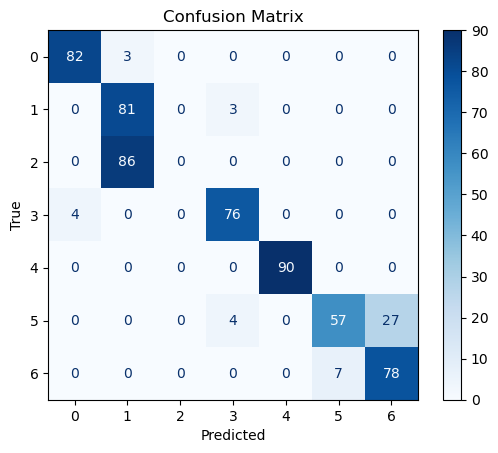

F1 Score for SVM : 0.7286325102968844
Confustion Matrix for SVM


<Figure size 800x600 with 0 Axes>

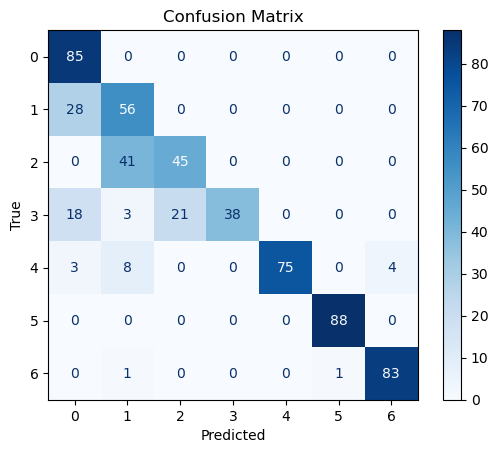

F1 Score for Naive Bayes : 0.7801853027151698


In [10]:
# 3.3

### Your code begins here ###
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score

def fit_normalize_data(X_train):
    # Normalize data between (0-1)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    return scaler

# Joint feture representation of 86-dimensional feature vector
X_train_joint = np.concatenate((train_pca_transform_accelarometer, train_pca_transform_depth_sensor), axis=1)
X_test_joint = np.concatenate((test_pca_transform_accelarometer, test_pca_transform_depth_sensor), axis=1)

# Fit normalization scaler on training data
scaler_train = fit_normalize_data(X_train_joint)

# Use the fitted scaler to transform both training and test data
normalized_X_train = scaler_train.transform(X_train_joint)
normalized_X_test = scaler_train.transform(X_test_joint)

# Support Vector Machine (SVM) with RBF kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(normalized_X_train, y_train_acc)

# Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(normalized_X_train, y_train_acc)

# Predictions on the test set
svm_predictions = svm_classifier.predict(normalized_X_test)
nb_predictions = nb_classifier.predict(normalized_X_test)

# Evaluate SVM
svm_f1_score = calculate_f1_score(y_test_dc, svm_predictions)
print("Confustion Matrix for SVM")
plot_confusion_matrix(y_test_dc, svm_predictions)
print(f"F1 Score for SVM : {svm_f1_score}")

# Evaluate Naive Bayes
nb_f1_score = calculate_f1_score(y_test_dc, nb_predictions)
print("Confustion Matrix for SVM")
plot_confusion_matrix(y_test_dc, nb_predictions)
print(f"F1 Score for Naive Bayes : {nb_f1_score}")

### Your code ends here ###

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br>
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0).
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$.<br>
Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>

Note: Normalize the data along each axis.
<br>

Document your work, answer the given question, evaluate the results, and analyse the outcomes.
    
</div>

Best parameter for Models of : Accelarometer
Confustion Matrix for SVM


<Figure size 800x600 with 0 Axes>

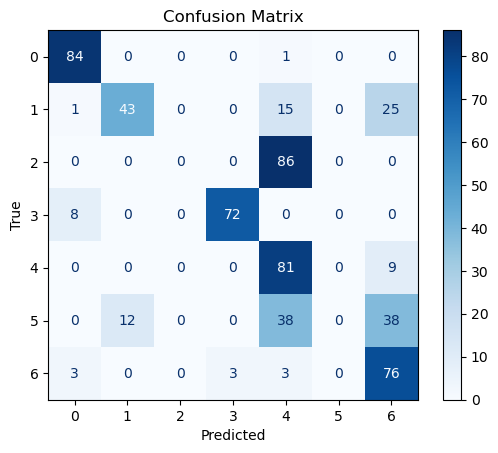

F1 Score for SVM : 0.5205997387880414
Confustion Matrix for AdaBoost


<Figure size 800x600 with 0 Axes>

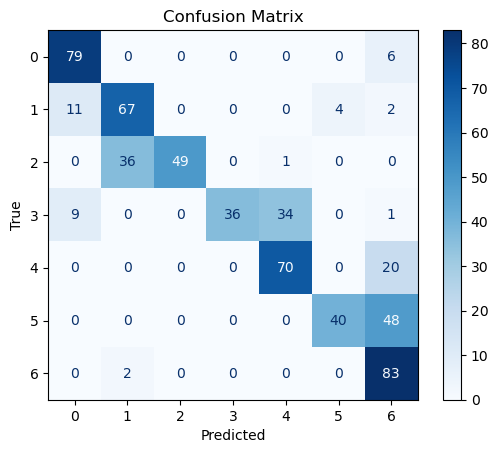

F1 Score for Naive Bayes : 0.7022666123834927
Best parameters for SVM: {'C': 100.0, 'gamma': 1.0}
Best parameters for AdaBoost: {'learning_rate': 0.25, 'n_estimators': 500}
Best parameter for Models of : Depth Camera
Confustion Matrix for SVM


<Figure size 800x600 with 0 Axes>

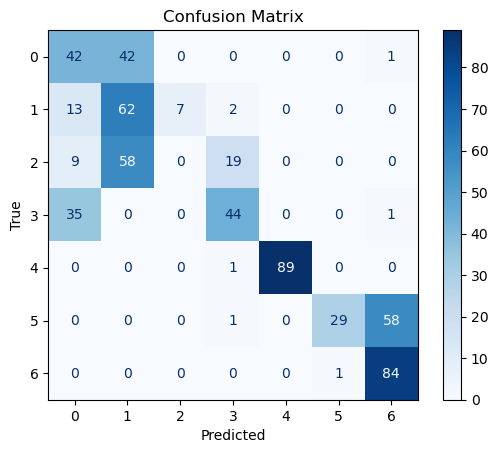

F1 Score for SVM : 0.5398270744659526
Confustion Matrix for AdaBoost


<Figure size 800x600 with 0 Axes>

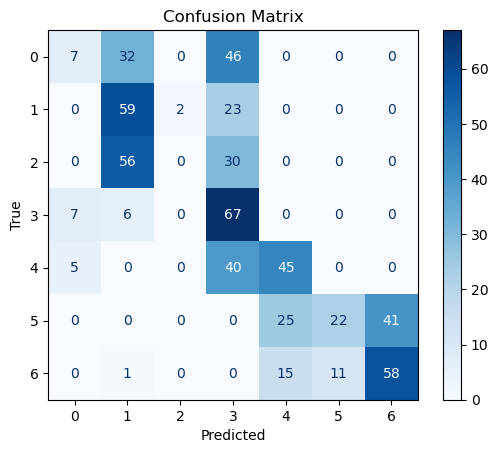

F1 Score for Naive Bayes : 0.3724717190007654
Best parameters for SVM: {'C': 10.0, 'gamma': 1.0}
Best parameters for AdaBoost: {'learning_rate': 0.75, 'n_estimators': 1000}


In [11]:
# 4.1

### Your code begins here ###

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

def train_and_optimize_classifiers(X_train, y_train, X_test, y_test, k_fold=10, random_state=0):
    
    # Fit normalization scaler on training data
    scaler_train = fit_normalize_data(X_train)

    # Use the fitted scaler to transform both training and test data
    normalized_X_train = scaler_train.transform(X_train)
    normalized_X_test = scaler_train.transform(X_test)

    # Define parameter grids for SVM and AdaBoost
    svm_param_grid = {
        'C': [0.1, 1.0, 10.0, 100.0],
        'gamma': [0.1, 0.25, 0.5, 0.75, 1.0, 2.0]
    }

    adaboost_param_grid = {
        'n_estimators': [50, 100, 500, 1000],
        'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0]
    }

    # SVM with RBF kernel
    svm_classifier = SVC(kernel='rbf', probability=True, random_state=random_state)
    svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=k_fold)
    svm_grid_search.fit(normalized_X_train, y_train)

    # AdaBoost classifier
    adaboost_classifier = AdaBoostClassifier(random_state=random_state)
    adaboost_grid_search = GridSearchCV(adaboost_classifier, adaboost_param_grid, cv=k_fold)
    adaboost_grid_search.fit(normalized_X_train, y_train)
    
    # Predictions on the test set
    svm_predictions = svm_grid_search.predict(normalized_X_test)
    adaboost_predictions = adaboost_grid_search.predict(normalized_X_test)

    # Evaluate SVM
    svm_f1_score = calculate_f1_score(y_test, svm_predictions)
    print("Confustion Matrix for SVM")
    plot_confusion_matrix(y_test, svm_predictions)
    print(f"F1 Score for SVM : {svm_f1_score}")

    # Evaluate AdaBoost
    adaboost_f1_score = calculate_f1_score(y_test, adaboost_predictions)
    print("Confustion Matrix for AdaBoost")
    plot_confusion_matrix(y_test, adaboost_predictions)
    print(f"F1 Score for Naive Bayes : {adaboost_f1_score}")
    
    # Return the best parameters
    best_params = {
        'svm': svm_grid_search.best_params_,
        'adaboost': adaboost_grid_search.best_params_
    }
    
    # Return the best models
    best_models = {
        'svm': svm_grid_search,
        'adaboost': adaboost_grid_search
    }


    return best_params, best_models

# train_pca_transform_accelarometer, test_pca_transform_accelarometer
# train_pca_transform_depth_sensor, test_pca_transform_depth_sensor

# Run grid search for Accelarometer data
print("Best parameter for Models of : Accelarometer")
best_parameters_acc, best_models_acc = train_and_optimize_classifiers(train_pca_transform_accelarometer, y_train_acc, test_pca_transform_accelarometer, y_test_acc)
print("Best parameters for SVM:", best_parameters_acc['svm'])
print("Best parameters for AdaBoost:", best_parameters_acc['adaboost'])

# Run grid search for Accelarometer data
print("Best parameter for Models of : Depth Camera")
best_parameters_dc, best_models_dc = train_and_optimize_classifiers(train_pca_transform_depth_sensor, y_train_dc, test_pca_transform_depth_sensor, y_test_dc)
print("Best parameters for SVM:", best_parameters_dc['svm'])
print("Best parameters for AdaBoost:", best_parameters_dc['adaboost'])

### Your code ends here ###

<a id='task4'></a>
<div class=" alert alert-warning">


<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [12]:
# 4.2

### Your code begins here ###

# Fit normalization scaler on training data
scaler_train_acc = fit_normalize_data(train_pca_transform_accelarometer)
scaler_train_dc = fit_normalize_data(train_pca_transform_depth_sensor)

# Use the fitted scaler to transform test data
normalized_X_test_acc = scaler_train_acc.transform(test_pca_transform_accelarometer)
normalized_X_test_dc = scaler_train_dc.transform(test_pca_transform_depth_sensor)

# Extract best models for each modalities
svm_acc = best_models_acc['svm']
adaboost_acc = best_models_acc['adaboost']
svm_dc = best_models_dc['svm']
adaboost_dc = best_models_dc['adaboost']

# SVM Probabilistic Outputs for Accelarometer
svm_probabilities_acc = svm_acc.predict_proba(normalized_X_test_acc)

# AdaBoost Probabilistic Outputs Accelarometer
adaboost_probabilities_acc = adaboost_acc.predict_proba(normalized_X_test_acc)

# SVM Probabilistic Outputs for Depth Camera
svm_probabilities_dc = svm_dc.predict_proba(normalized_X_test_dc)

# AdaBoost Probabilistic Outputs Depth Camera
adaboost_probabilities_dc = adaboost_dc.predict_proba(normalized_X_test_dc)

### Your code ends here ###

<a id='task4'></a>
<div class=" alert alert-warning">
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

Confustion Matrix for fixed classification rule:'max' 


<Figure size 800x600 with 0 Axes>

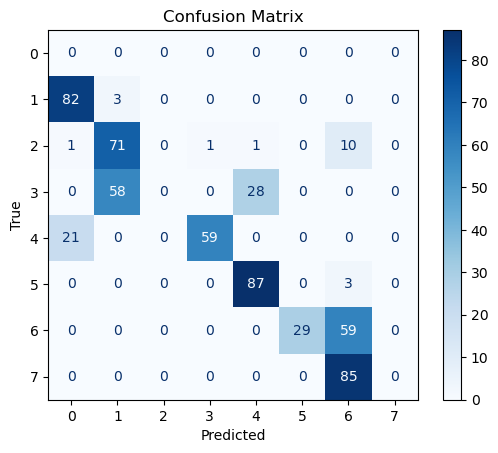

F1 Score for fixed classification rule:'max' : 0.0727546318066397
Confustion Matrix for fixed classification rule:'max' 


<Figure size 800x600 with 0 Axes>

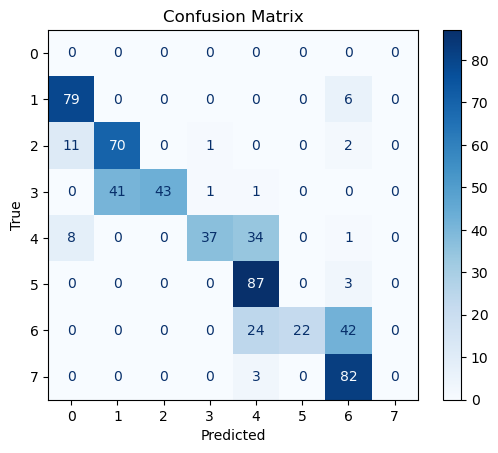

F1 Score for fixed classification rule:'max' : 0.0982776044915783
Confustion Matrix for fixed classification rule:'max' 


<Figure size 800x600 with 0 Axes>

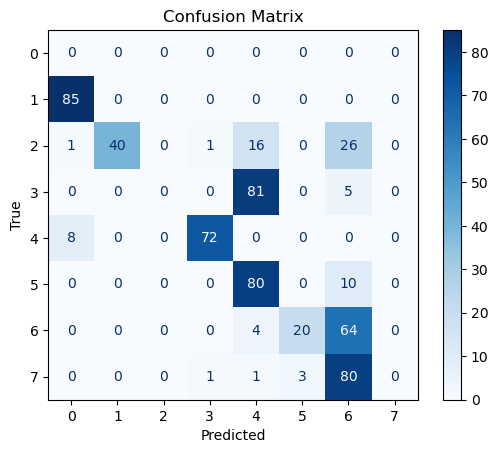

F1 Score for fixed classification rule:'max' : 0.06698063840920983
Confustion Matrix for fixed classification rule:'max' 


<Figure size 800x600 with 0 Axes>

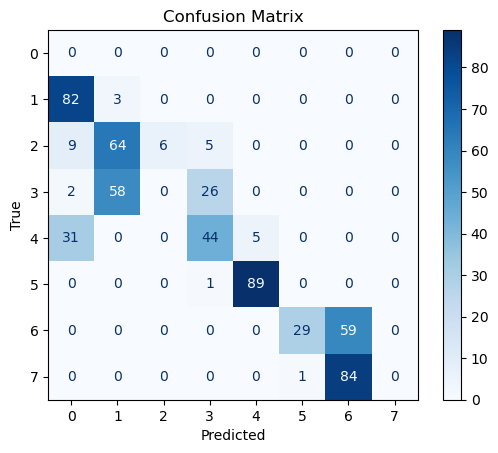

F1 Score for fixed classification rule:'max' : 0.15016945591658235


In [13]:
# 4.3

### Your code begins here ###

def combine_probabilistic_outputs(probabilities_modality1, probabilities_modality2, rule='max'):
    
    if rule == 'max':
        combined_probabilities = np.maximum(probabilities_modality1, probabilities_modality2)
    elif rule == 'min':
        combined_probabilities = np.minimum(probabilities_modality1, probabilities_modality2)
    elif rule == 'prod':
        combined_probabilities = probabilities_modality1 * probabilities_modality2
    elif rule == 'sum':
        combined_probabilities = probabilities_modality1 + probabilities_modality2
    else:
        raise ValueError("Invalid rule. Supported rules are 'max', 'min', 'prod', and 'sum'.")

    return combined_probabilities

def evaluate_combined_results(y_true, combined_probabilities, rule='max'):
    
    # Convert probabilistic outputs to class predictions
    combined_predictions = np.argmax(combined_probabilities, axis=1)

    # Calculate F1 score
    f1 = calculate_f1_score(y_true, combined_predictions)
    
    print(f"Confustion Matrix for fixed classification rule:'{rule}' ")
    plot_confusion_matrix(y_true, combined_predictions)
    print(f"F1 Score for fixed classification rule:'{rule}' : {f1}")



# SVM(Acc) + SVM(Depth)
combined_svm_svm = combine_probabilistic_outputs(svm_probabilities_acc, svm_probabilities_dc, rule='max')
evaluate_combined_results(y_test_acc.astype(int), combined_svm_svm)

# AdaBoost(Acc) + AdaBoost(Depth)
combined_adaboost_adaboost = combine_probabilistic_outputs(adaboost_probabilities_acc, adaboost_probabilities_dc, rule='max')
evaluate_combined_results(y_test_acc.astype(int), combined_adaboost_adaboost)

# SVM(Acc) + AdaBoost(Depth)
combined_svm_adaboost = combine_probabilistic_outputs(svm_probabilities_acc, adaboost_probabilities_dc, rule='max')
evaluate_combined_results(y_test_acc.astype(int), combined_svm_adaboost)

# AdaBoost(Acc) + SVM(Depth)
combined_adaboost_svm = combine_probabilistic_outputs(adaboost_probabilities_acc, svm_probabilities_dc, rule='max')
evaluate_combined_results(y_test_acc.astype(int), combined_adaboost_svm)

### Your code ends here ###

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br>
<br>
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br>
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [14]:
# 5.1

### Your code begins here ###

### Your code ends here ###

<a id='task5'></a>
<div class=" alert alert-warning">

<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [15]:
# 5.2

### Your code begins here ###

### Your code ends here ###